In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [45]:
# Reemplaza "moviereviews.csv" con el nombre exacto del archivo si es diferente
df = pd.read_csv("moviereviews.csv")

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [47]:
# Convertir las etiquetas (label) en valores binarios: neg -> 0, pos -> 1
df['label'] = df['label'].map({'neg': 0, 'pos': 1})

In [48]:
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


In [53]:
# Eliminar filas con valores NaN en "review"
df = df.dropna(subset=['review'])
df = df.dropna(subset=['label'])

In [54]:
# Dividir los datos en características (X) y etiquetas (y)
X = df['review']  # Texto de las reseñas
y = df['label']   # Etiquetas

In [55]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Vectorizar el texto con Bag of Words
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [57]:
# Función para imprimir métricas
def evaluate_model(y_true, y_pred, model_name):
    print(f"Resultados para {model_name}:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}\n")

Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

# Entrenar el modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Predicciones
y_pred_nb = nb_model.predict(X_test_vect)

In [59]:
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

Resultados para Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       202
           1       0.81      0.74      0.77       191

    accuracy                           0.79       393
   macro avg       0.79      0.79      0.79       393
weighted avg       0.79      0.79      0.79       393

Accuracy: 0.79



Regresión Logística

In [60]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de Regresión Logística
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_vect)

In [61]:
evaluate_model(y_test, y_pred_lr, "Regresión Logística")

Resultados para Regresión Logística:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       202
           1       0.83      0.84      0.83       191

    accuracy                           0.84       393
   macro avg       0.84      0.84      0.84       393
weighted avg       0.84      0.84      0.84       393

Accuracy: 0.84



Máquinas con vectores de soporte

In [62]:
from sklearn.svm import LinearSVC

# Entrenar el modelo SVM
svm_model = LinearSVC()
svm_model.fit(X_train_vect, y_train)

# Predicciones
y_pred_svm = svm_model.predict(X_test_vect)

In [63]:
evaluate_model(y_test, y_pred_svm, "SVM")

Resultados para SVM:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       202
           1       0.82      0.80      0.81       191

    accuracy                           0.82       393
   macro avg       0.82      0.82      0.82       393
weighted avg       0.82      0.82      0.82       393

Accuracy: 0.82



Arboles de decisión

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vect, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test_vect)

In [65]:
evaluate_model(y_test, y_pred_dt, "Árbol de Decisión")

Resultados para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       202
           1       0.61      0.54      0.57       191

    accuracy                           0.61       393
   macro avg       0.61      0.61      0.61       393
weighted avg       0.61      0.61      0.61       393

Accuracy: 0.61



Bosques aleatorios

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vect, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_vect)

In [67]:
evaluate_model(y_test, y_pred_rf, "Bosque Aleatorio")

Resultados para Bosque Aleatorio:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       202
           1       0.77      0.76      0.76       191

    accuracy                           0.77       393
   macro avg       0.77      0.77      0.77       393
weighted avg       0.77      0.77      0.77       393

Accuracy: 0.77



Evaluación de Modelos

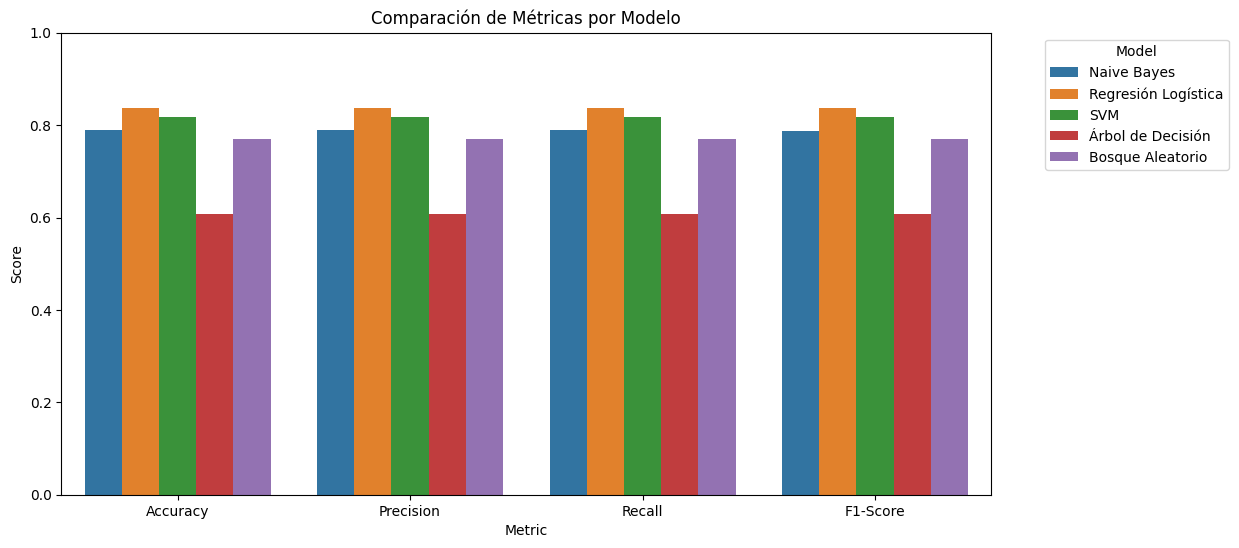

In [68]:
# Función para calcular métricas clave
def calculate_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# Calcular métricas para cada modelo
metrics = [
    calculate_metrics(y_test, y_pred_nb, "Naive Bayes"),
    calculate_metrics(y_test, y_pred_lr, "Regresión Logística"),
    calculate_metrics(y_test, y_pred_svm, "SVM"),
    calculate_metrics(y_test, y_pred_dt, "Árbol de Decisión"),
    calculate_metrics(y_test, y_pred_rf, "Bosque Aleatorio")
]

# Convertir a DataFrame para graficar
import pandas as pd
df_metrics = pd.DataFrame(metrics).melt(id_vars='Model', var_name='Metric', value_name='Value')

# Graficar las métricas por modelo
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_metrics)
plt.title('Comparación de Métricas por Modelo')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()